## Predicting car prices using K Nearest Neighbours

I first import pandas and numpy and import the csv.

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


I replace values that are '?' with NaN values.

In [4]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


I change the values into floats.

In [5]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

I substitute NaN values for the mean.

In [6]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

I normalise the price.

In [7]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

I import the model and define a function that allows me to train it and find the mse and rmse.

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    last_train_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    predicted_labels = knn.predict(test_df[[train_col]])

    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          4244.103421
highway-mpg          4245.734567
curb-weight          4436.523561
width                5030.139338
city-mpg             5085.047194
horsepower           5092.272401
length               5418.778301
wheel-base           5743.877086
bore                 6746.031651
compression-rate     7177.202061
normalized-losses    7374.513274
height               7832.152833
peak-rpm             7965.541705
stroke               8096.653898
dtype: float64

In [9]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)

    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    last_train_row = int(len(rand_df) / 2)

    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        predicted_labels = knn.predict(test_df[[train_col]])

        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 7930.548590614734,
  3: 6353.8909942494565,
  5: 6746.031650636273,
  7: 7246.705124103924,
  9: 7184.417703627346},
 'city-mpg': {1: 6449.848972168971,
  3: 4808.843642391777,
  5: 5085.0471938761675,
  7: 4958.158653064454,
  9: 5021.788908379828},
 'compression-rate': {1: 7255.772135357892,
  3: 7485.226183865361,
  5: 7177.202060550313,
  7: 7333.967327565648,
  9: 7426.77234607814},
 'curb-weight': {1: 5842.169653813219,
  3: 4527.849193303364,
  5: 4436.523561278551,
  7: 4320.057970537657,
  9: 4181.086220663609},
 'engine-size': {1: 4775.980594973188,
  3: 4211.354845313718,
  5: 4244.103420588581,
  7: 4028.227456215567,
  9: 4125.116174076774},
 'height': {1: 10653.050778292903,
  3: 8176.934988463841,
  5: 7832.152832500197,
  7: 7743.870132519971,
  9: 7632.665665042622},
 'highway-mpg': {1: 4445.090471315778,
  3: 4442.016315845971,
  5: 4245.734566600798,
  7: 4266.445995724475,
  9: 4522.647593669363},
 'horsepower': {1: 5261.091645623908,
  3: 4995.30290628

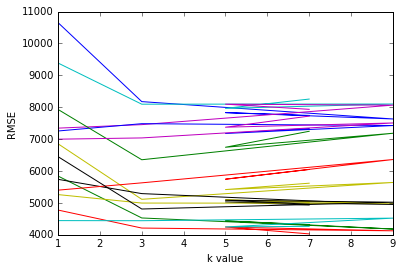

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [11]:
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine-size          4276.956498
highway-mpg          4384.386989
curb-weight          4661.537320
horsepower           5072.792482
width                5189.360872
city-mpg             5264.737474
length               5729.055853
wheel-base           5836.640746
bore                 7092.318813
normalized-losses    7328.329841
compression-rate     7335.788011
stroke               7779.820219
peak-rpm             8361.301724
height               8407.734879
dtype: float64


In [12]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)

    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    last_train_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:

        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        predicted_labels = knn.predict(test_df[train_cols])

        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'2 best features': {5: 3412.89673930856},
 '3 best features': {5: 3570.502548686472},
 '4 best features': {5: 3899.4382458155237},
 '5 best features': {5: 3801.3178593298467},
 '6 best features': {5: 3773.2372117657646}}

In [13]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    last_train_row = int(len(rand_df) / 2)

    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:

        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        predicted_labels = knn.predict(test_df[train_cols])

        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'2 best features': {1: 4022.8740864942806,
  2: 3680.3404469950538,
  3: 3515.039976496706,
  4: 3519.438236926101,
  5: 3412.89673930856,
  6: 3519.8030683714037,
  7: 3724.0460620414588,
  8: 3834.0585776937673,
  9: 3795.6406568326815,
  10: 3860.952972566357,
  11: 4093.551524283771,
  12: 4163.573406673935,
  13: 4255.027374020241,
  14: 4210.215815095833,
  15: 4256.70492810227,
  16: 4386.216597807453,
  17: 4503.471179969052,
  18: 4621.849505979088,
  19: 4667.894753179334,
  20: 4715.040360341434,
  21: 4711.269545595229,
  22: 4772.074216981012,
  23: 4845.610129236966,
  24: 4887.9659784971545},
 '3 best features': {1: 4143.620686482709,
  2: 3637.594322286803,
  3: 3631.195257688884,
  4: 3852.5440279254526,
  5: 3570.502548686472,
  6: 3632.45246417794,
  7: 3776.2483778694977,
  8: 3863.3357087179375,
  9: 3998.9672092179576,
  10: 4096.564137613107,
  11: 4185.617526806375,
  12: 4154.7511989984105,
  13: 4311.256524718049,
  14: 4445.0417403618685,
  15: 4561.23032351

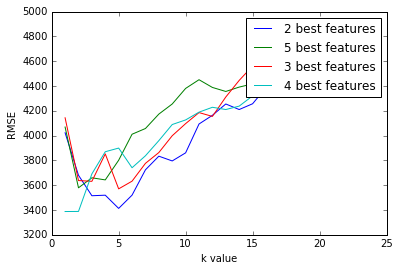

In [14]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()